<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right> 

# Lab 8: Supervised Learning

Towards the end of this lesson, you should be able to:
- experiments with Naive Bayes
- experiments with Decision Tree


# Naive Bayes

In [1]:
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
df=pd.read_csv('iris.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.shape

(150, 5)

In [14]:
# For this example, we use the mass, width, and height features of each plant instance
X = df.drop('Species', axis=1) #data without the class attribute
y = df['Species'] #data that has only class attribute
 

In [15]:
# Prepare X_train, X_test, y_train, y_test
# Your answers here...

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.3, random_state=0)
#training dataset is used to build the model
#Testing dataset is used to evaluate the quality of the model
#X_train = training dataset without class attribute
#Y_train = training dataset with only class attribute
#X_test = testing dataset without class attribute
#Y_test = testing dataset with only class attribute
#train:test = 60:40/70:30/80:20
#from the code, test_size is 0.3 = 30%

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [18]:
# Perform prediction

y_pred=nb.predict(X_test)
y_pred


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype='<U10')

In [19]:

species_prediction = nb.predict([[2, 3.2, 1.5, 0.5]])
print('species name is '+ species_prediction[0])

species name is setosa


In [20]:

species_prediction = nb.predict([[2.5, 5, 4, 4]])
print('species name is '+ species_prediction[0])

species name is virginica


In [21]:

nb.score(X_test, y_test)

1.0

# Decision Tree

you need to load ``from sklearn.tree import DecisionTreeClassifier``

In [42]:
# Load the relevant libraries

import pandas as pd
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split functionn

from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn import tree

In [43]:
# load diabetes.csv dataset*

pima = pd.read_csv("diabetes.csv")
pima.head()
#dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
# check the data types

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [45]:
# the goal variable must be categorical data, cannot be numerical data. Take note of the change in data type for Outcome

pima.Outcome = pima['Outcome'].apply(str)

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [46]:
#split dataset in features and target variable*

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'] 
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [47]:
# Split dataset into training set and test set*
# 70-30 split and set random_state=1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [48]:
# Create Decision Tree classifer object and list all the default parameters
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train) #build the training model


In [49]:
# Train Decision Tree Classifer using default parameters

# 
clf = clf.fit(X_train, y_train)
#Predict the response for test dataset

# Your answers here...
y_pred = clf.predict(X_test)
y_pred


array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1

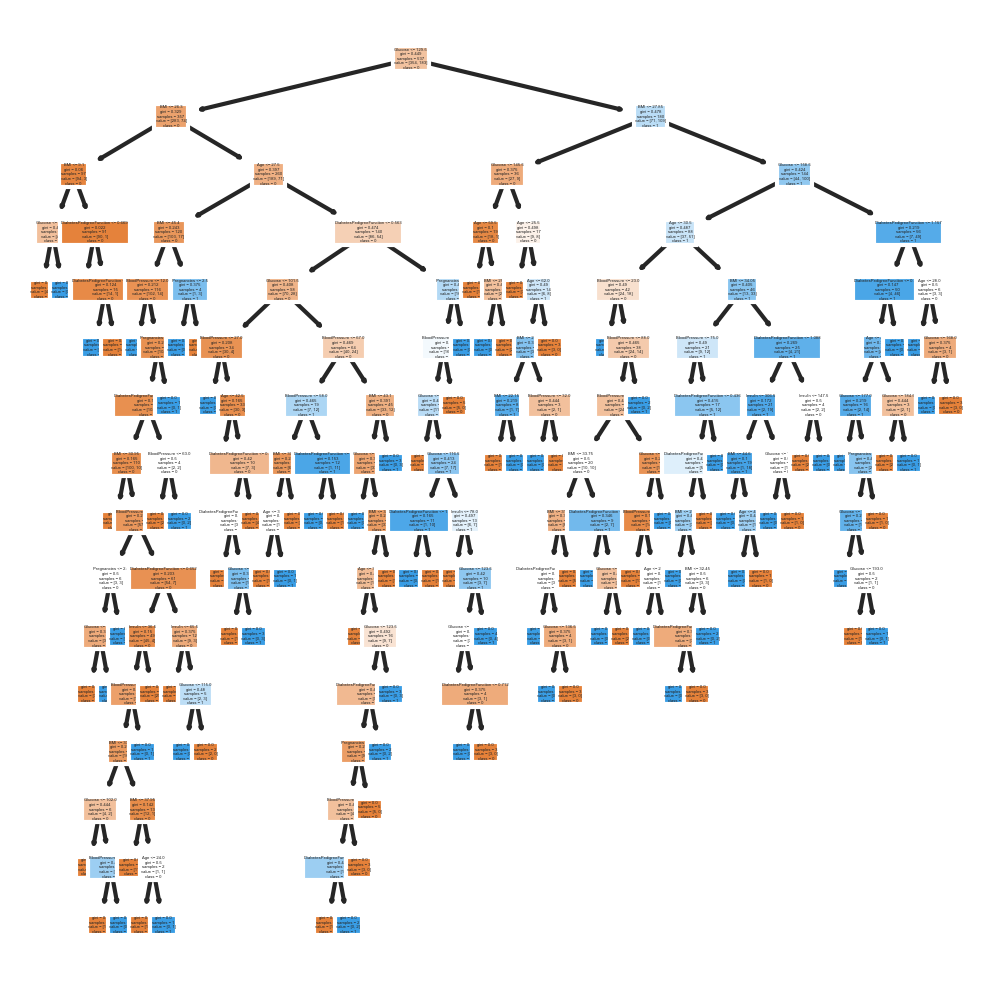

In [50]:
fn=X.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

**NOTE:** the ``value`` represents the value for class 0 and 1, respectively

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

In [41]:
clf.score(X_test,y_test)

0.7705627705627706

## Modifying the Decision Tree Parameters

Try change from ``Gini`` to ``Entropy``

In [36]:
# Create Decision Tree classifer object

# Your answers here...
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2) #pruning the tree

# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset*
y_pred = clf.predict(X_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0

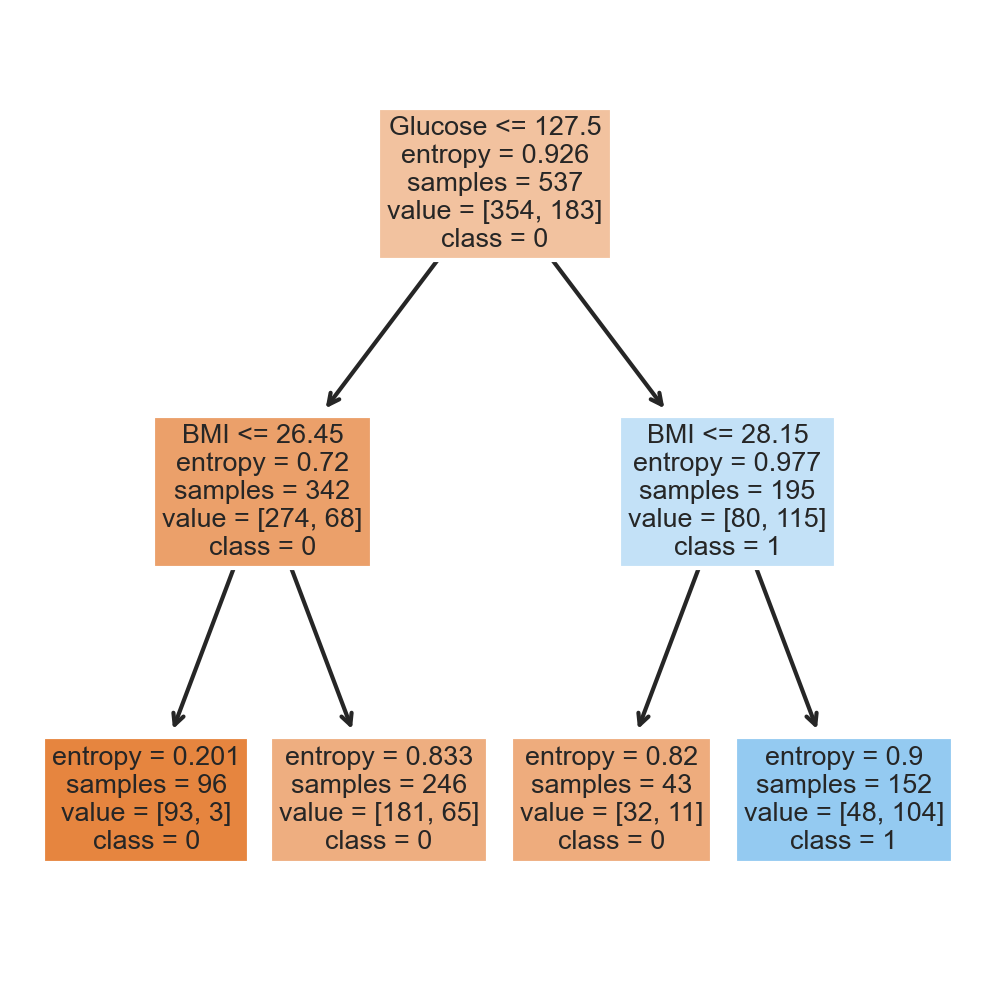

In [37]:
fn=X.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [38]:
clf.score(X_test, y_test)

0.7705627705627706